In [ ]:
import pymaid
import navis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import scipy.stats as stats
import pandas as pd

# connect your catmaid instance
catmaid_token = ""
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes', catmaid_token)

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [11]:
# fetch OSNs of interest
OSNs = pymaid.get_skids_by_annotation(['innervates MD1', 'left palp nerve', 'sensory neuron'], allow_partial = False, intersect = True)
neurons = pymaid.get_neuron(OSNs)

Fetch neurons:   0%|          | 0/45 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/45 [00:00<?, ?it/s]

In [12]:
#initialize an empty array
ribbon_SIs=[]

for n in neurons:
    # Reroot to soma here but you will want to use the base of ORN (if root is not already there)
    n.reroot(n.root, inplace=True)

    # Add Strahler index column
    navis.strahler_index(n, method='greedy')

    # Invert such that backbone is order 1
    n.nodes['strahler_index_inv'] = n.nodes.strahler_index.max() - n.nodes.strahler_index

    # Create a node ID -> Strahler map
    strahler_map = n.nodes.set_index('node_id').strahler_index_inv.to_dict()

    #Find treenodes that are presynaptic to connector nodes tagged 'ribbon synapse', should be a dataframe
    ribbonsynapses=pymaid.get_connectors(n,tags='ribbon synapse',relation_type='presynaptic_to')

    #check that there is in fact a ribbon synapse in the neuron n
    if len(ribbonsynapses)==0:
	    print('this neuron has no ribbon synapses')
    else:
	    #pull node values from ribbonsynapses dataframe
        ribbonnodes=ribbonsynapses.connector_id.values
        connectordetails=pymaid.get_connector_details(ribbonnodes)
        ribbonnodes=ribbonsynapses.connector_id.values
        rb_ids = connectordetails.presynaptic_to_node.values
	    #print(rb_ids)
	    #Calculate inverted Strahler index of treenodes presynaptic to 'ribbon synapse' connector tag
        ribbon_SI = [strahler_map[node] for node in rb_ids]
        ribbon_SIs.append(ribbon_SI)
print(ribbon_SIs)

CN details:   0%|          | 0/3 [00:00<?, ?it/s]

INFO  : Data for 3 of 3 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses
this neuron has no ribbon synapses


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses
this neuron has no ribbon synapses


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses
this neuron has no ribbon synapses


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses
this neuron has no ribbon synapses
this neuron has no ribbon synapses
[[6, 6, 2], [20], [0, 7], [0, 0], [1, 5], [0], [4, 0], [11], [2, 20], [1], [5, 3], [0], [1], [2], [3, 3], [0], [9, 1], [0], [3], [1], [2], [2], [11], [1], [0], [0], [0, 0]]


In [13]:
import itertools
ribbonSIs = list(itertools.chain(*ribbon_SIs))

In [14]:
#TBARS BRANCH ORDER

all_SIs=np.array([])
#initialize an empty list
all_SIlist=[]


#loop through all the MD2 OSNs
for n in neurons:

        #define rootnode
        n.reroot(n.root, inplace=True)

        # Add Strahler index column
        navis.strahler_index(n,method='greedy')

        # Invert such that backbone is order 1
        n.nodes['strahler_index_inv'] = n.nodes.strahler_index.max() - n.nodes.strahler_index

        # Create a node ID -> Strahler map. Transforms node IDs in dataframe and
        #strahler index into keys and values in a dictionary.
        strahler_map = n.nodes.set_index('node_id').strahler_index_inv.to_dict()

        #fetch all outgoing connector nodes
        allconnectors=pymaid.get_connectors(n,relation_type='presynaptic_to')

        #turn all connector id's into a set
        all_connector_ids = set(allconnectors.connector_id)

        #subset that to get all ribbon synapses and turn that into a set
        ribbonsynapses=pymaid.get_connectors(n,tags='ribbon synapse', relation_type = 'presynaptic_to')
        ribbon_connector_ids = set(ribbonsynapses.connector_id)

        #subset all synapses that are NOT ribbons, ie. t-bar connectors
        non_ribbon_connector_ids = all_connector_ids - ribbon_connector_ids

        #get the skeleton node presynaptic to the connectors
        skeleton_nodes=pymaid.get_connector_details(non_ribbon_connector_ids)
        skeleton_ids=skeleton_nodes.presynaptic_to_node.values

        #calculate the inverse Strahler index for synapses
        connector_SI = [strahler_map[node] for node in skeleton_ids]
        #print(connector_SI)

        #print histogram stats
        #hist=plt.hist(connector_SI,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
        all_SIs=np.concatenate((all_SIs,connector_SI))
        all_SIs=all_SIs.tolist()
        all_SIlist.append(all_SIs)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/229 [00:00<?, ?it/s]

INFO  : Data for 229 of 229 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/504 [00:00<?, ?it/s]

INFO  : Data for 504 of 504 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/489 [00:00<?, ?it/s]

INFO  : Data for 489 of 489 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/333 [00:00<?, ?it/s]

INFO  : Data for 333 of 333 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/284 [00:00<?, ?it/s]

INFO  : Data for 284 of 284 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/161 [00:00<?, ?it/s]

INFO  : Data for 161 of 161 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/301 [00:00<?, ?it/s]

INFO  : Data for 301 of 301 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/199 [00:00<?, ?it/s]

INFO  : Data for 199 of 199 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/235 [00:00<?, ?it/s]

INFO  : Data for 235 of 235 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/488 [00:00<?, ?it/s]

INFO  : Data for 488 of 488 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/360 [00:00<?, ?it/s]

INFO  : Data for 360 of 360 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/241 [00:00<?, ?it/s]

INFO  : Data for 241 of 241 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/481 [00:00<?, ?it/s]

INFO  : Data for 481 of 481 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/301 [00:00<?, ?it/s]

INFO  : Data for 301 of 301 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/488 [00:00<?, ?it/s]

INFO  : Data for 488 of 488 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/338 [00:00<?, ?it/s]

INFO  : Data for 338 of 338 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/184 [00:00<?, ?it/s]

INFO  : Data for 184 of 184 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/434 [00:00<?, ?it/s]

INFO  : Data for 434 of 434 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/324 [00:00<?, ?it/s]

INFO  : Data for 324 of 324 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/278 [00:00<?, ?it/s]

INFO  : Data for 278 of 278 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/181 [00:00<?, ?it/s]

INFO  : Data for 181 of 181 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/327 [00:00<?, ?it/s]

INFO  : Data for 327 of 327 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/225 [00:00<?, ?it/s]

INFO  : Data for 225 of 225 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/282 [00:00<?, ?it/s]

INFO  : Data for 282 of 282 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/254 [00:00<?, ?it/s]

INFO  : Data for 254 of 254 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/246 [00:00<?, ?it/s]

INFO  : Data for 246 of 246 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/168 [00:00<?, ?it/s]

INFO  : Data for 168 of 168 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/407 [00:00<?, ?it/s]

INFO  : Data for 407 of 407 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/315 [00:00<?, ?it/s]

INFO  : Data for 315 of 315 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/313 [00:00<?, ?it/s]

INFO  : Data for 313 of 313 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/313 [00:00<?, ?it/s]

INFO  : Data for 313 of 313 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/332 [00:00<?, ?it/s]

INFO  : Data for 332 of 332 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/261 [00:00<?, ?it/s]

INFO  : Data for 261 of 261 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/236 [00:00<?, ?it/s]

INFO  : Data for 236 of 236 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/103 [00:00<?, ?it/s]

INFO  : Data for 103 of 103 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/193 [00:00<?, ?it/s]

INFO  : Data for 193 of 193 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/196 [00:00<?, ?it/s]

INFO  : Data for 196 of 196 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/427 [00:00<?, ?it/s]

INFO  : Data for 427 of 427 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/225 [00:00<?, ?it/s]

INFO  : Data for 225 of 225 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/225 [00:00<?, ?it/s]

INFO  : Data for 225 of 225 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/197 [00:00<?, ?it/s]

INFO  : Data for 197 of 197 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/463 [00:00<?, ?it/s]

INFO  : Data for 463 of 463 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/276 [00:00<?, ?it/s]

INFO  : Data for 276 of 276 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/248 [00:00<?, ?it/s]

INFO  : Data for 248 of 248 unique connector IDs retrieved (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/248 [00:00<?, ?it/s]

INFO  : Data for 248 of 248 unique connector IDs retrieved (pymaid)


In [15]:
allSIlist = list(itertools.chain(*all_SIlist))

In [16]:
tbars = pd.DataFrame({'branch_order': pd.Series(allSIlist), 'synapse_type': pd.Series(["t-bars"]*len(allSIlist))})
ribbons = pd.DataFrame({'branch_order': pd.Series(ribbonSIs), 'synapse_type': pd.Series(["ribbons"]*len(ribbonSIs))})

In [17]:
synapse_branch_order = pd.concat([tbars,ribbons],axis=0)

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.


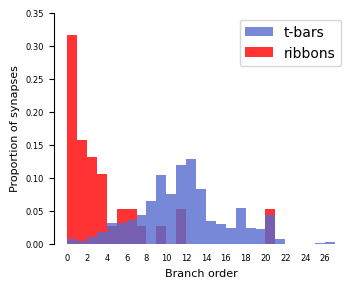

In [18]:
histplot_dims = (3.8, 3)
custom_palette=['#546BCE','#FF0000']
fig, ax = plt.subplots(figsize=histplot_dims)

ax.set_ylabel("Proportion of synapses",size=8)
ax.set_xlabel('Branch order', size=8, fontname="Liberation Sans")

sns.histplot(synapse_branch_order,stat='probability',x='branch_order',binwidth=1,hue='synapse_type',common_norm=False,palette=custom_palette,edgecolor=None,multiple='layer',alpha=.8)

plt.ylim(0,.35)
ax.get_legend().set_title("")
plt.xticks(np.arange(0, 0.5, step=.001),fontsize=6)
plt.xticks(np.arange(0, 28, step=2),fontsize=6)
plt.tick_params(axis='x', which='both', bottom=False, top=False,labelsize=6)
plt.tick_params(axis='y', which='both', left=True, right=False,labelsize=6)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)

plt.savefig('../svgs/synapse_type_proportion.svg', format="svg")
plt.show()

In [19]:
stats.mannwhitneyu(allSIlist, ribbonSIs)

MannwhitneyuResult(statistic=10903150.5, pvalue=5.933092870452202e-17)